In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [4]:
# Leer data

data_train = pd.read_csv('./mnist_train_small.csv', header=None)
data_test = pd.read_csv('./mnist_test.csv', header=  None)

In [5]:
y_train = data_train[0]
x_train = data_train.drop(columns=0)

y_test = data_test[0]
x_test = data_test.drop(columns=0)

x_train /= 255.0
x_test /= 255.0

In [6]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

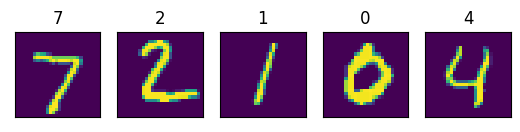

In [7]:
plot_example(x_test.values, y_test.values)

In [8]:
# Regresión Logística

modelo = LogisticRegression(max_iter=1000)
modelo.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
# Puntajes

print('Accuracy scores')
print('- Train:', modelo.score(x_train, y_train))
print('- Test:', modelo.score(x_test, y_test))

Accuracy scores
- Train: 0.95165
- Test: 0.9185


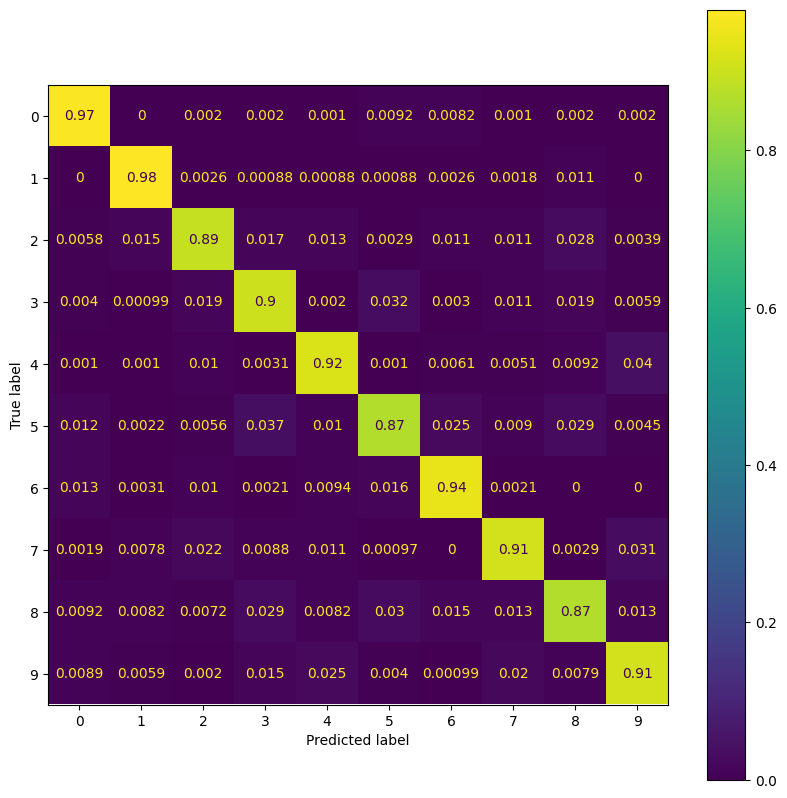

In [10]:
#Matriz de confusión para un análisis mas detallado

%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = modelo.predict(x_test)

fig, ax = plt.subplots(figsize=(10,10))

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', ax=ax)